In [49]:
#run: pip install openquantumcomputing
import sys
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [50]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

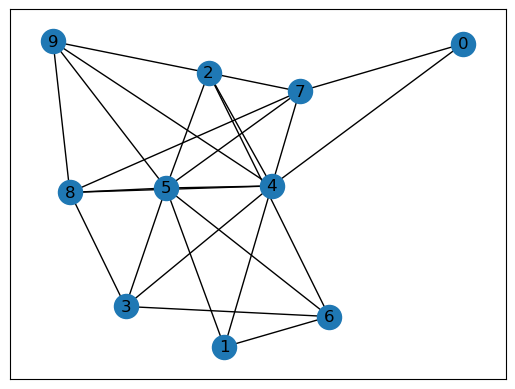

In [51]:
# Load graph from file
# Its connectivity is fixed but its graphical layout is new for each 'nx.spring_layout'

numV=10
G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k4_0.gml")
#numV=5
#G = nx.read_gml("../../data/sample_graphs/w_ba_n"+str(numV)+"_k2_0.gml")
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)

In [52]:
#  Initialize QAOA object
alpha = 0.01     # value for CVaR (Conditional Value at Risk)
params={'G': G, 'alpha': alpha}
qaoamc_cvar = QAOAMaxCut(params=params)
params={'G': G}
qaoamc = QAOAMaxCut(params=params)

In [53]:
# Solve the problem brute force by testing all possibilities of cuts, computing the cost (cut-weight) of all of them, and taking min
import itertools
costs=[]
for s in [''.join(i) for i in itertools.product('01', repeat =numV)]:
    tmp=-qaoamc.cost(s)
    costs.append(tmp)
mincost=min(costs)
print("minimum cost=",mincost)

minimum cost= -8.657714089848158


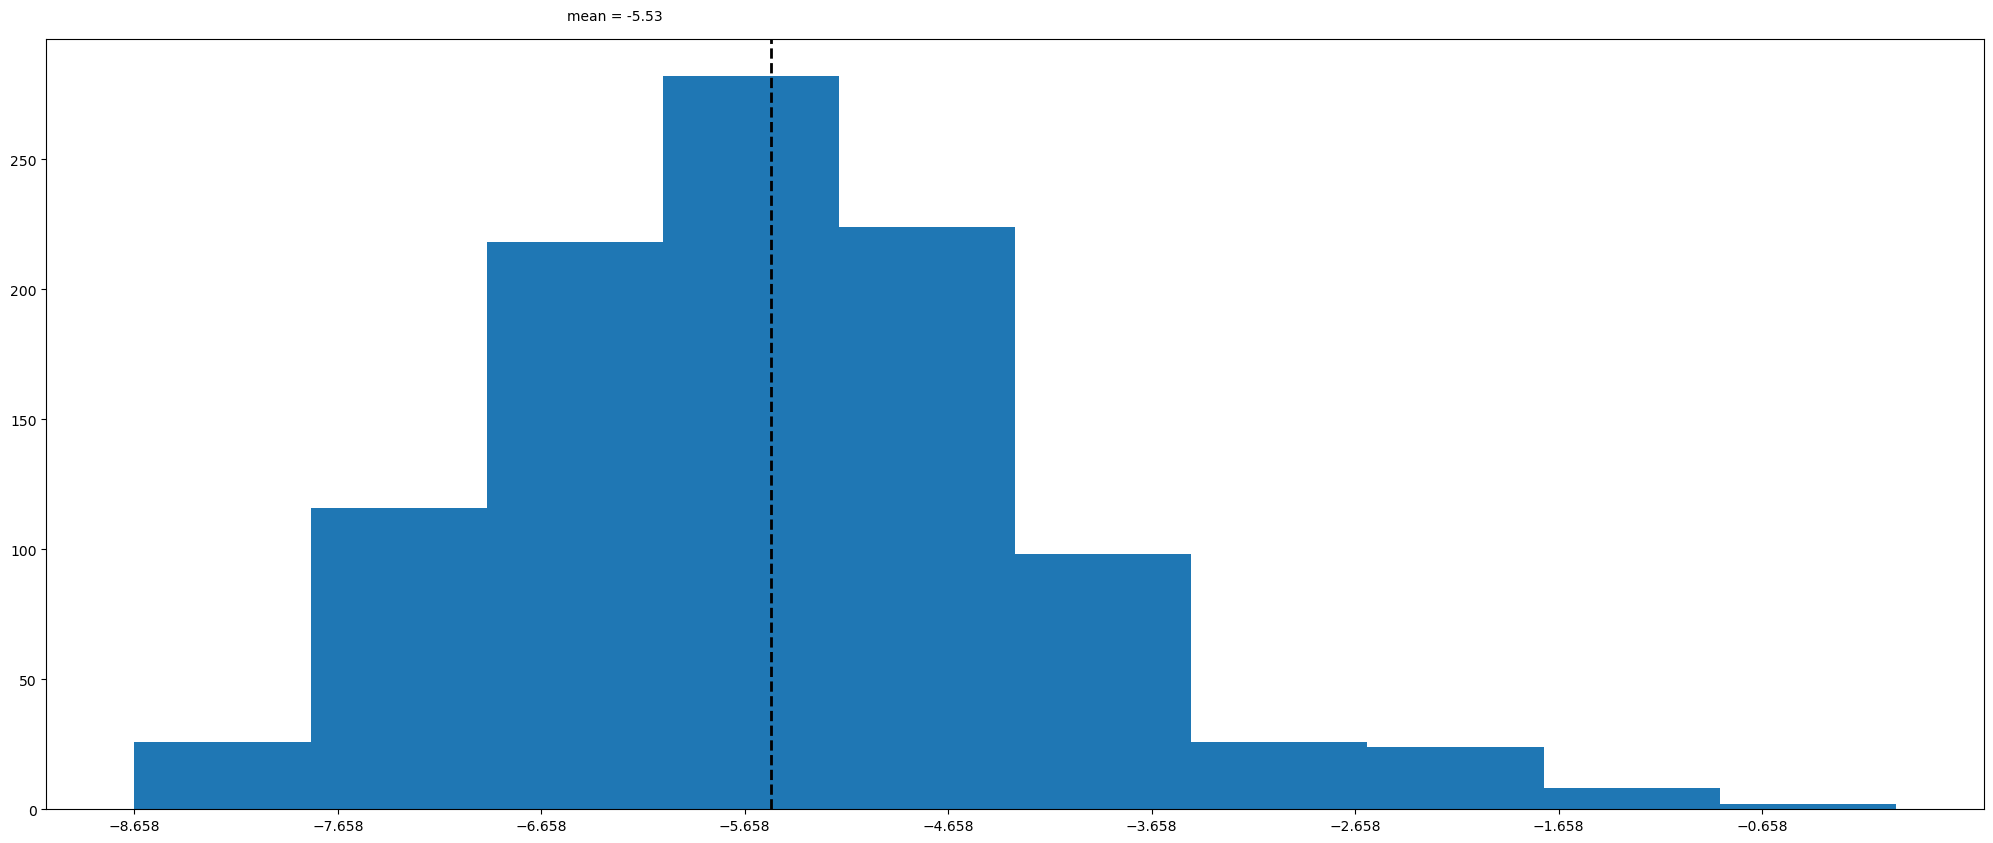

In [54]:
# Make histogram with the cost of all possible choices of cuts

max_val=max(costs)

pl.figure(figsize=(25,10))
_=pl.hist(np.sort(costs), bins=10)# bins=100)
min_ylim, max_ylim = pl.ylim()
max_ylim *=1.025
mean=np.mean(costs)
pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
_=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
_=pl.xticks(np.arange(mincost, max_val, step=1))

In [55]:
# Quantum computer simulator 
qasm_sim = Aer.get_backend('qasm_simulator')

In [56]:
# Evaluating the QAOA circuit with uniformly sampled angles for gamma and beta, just to see how sampling measurements from 
# the circuits roughly looks like.
qaoamc.sample_cost_landscape(qasm_sim, 1024, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
qaoamc_cvar.sample_cost_landscape(qasm_sim, 1024, angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})


Calculating Energy landscape for depth p=1...
Calculating Energy landscape done
Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


In [57]:
# Testing CVaR for various values of alpha

#orig_alpha = qaoamc.stat.alpha
#print("E: \t", qaoamc.stat.get_E())
##print("CVaR: \t", qaoamc.stat.get_CVaR())
#for a in [0.999, 0.99, 0.9, 0.7, 0.5, 0.1, 3.0/1024]:
#    qaoamc.stat.alpha = a
#    print("CVaR: \t", qaoamc.stat.get_CVaR(), "alpha: ", a)
#qaoamc.stat.alpha = orig_alpha

In [58]:
t = np.arange(10)
t[-4:]

array([6, 7, 8, 9])

EdgeView([('0', '4'), ('0', '7'), ('1', '4'), ('1', '5'), ('1', '6'), ('2', '4'), ('2', '5'), ('2', '6'), ('2', '7'), ('2', '9'), ('3', '4'), ('3', '5'), ('3', '6'), ('3', '8'), ('4', '5'), ('4', '7'), ('4', '8'), ('4', '9'), ('5', '6'), ('5', '7'), ('5', '8'), ('5', '9'), ('7', '8'), ('8', '9')])

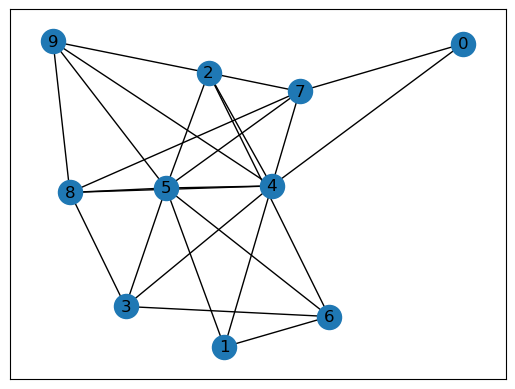

In [59]:
nx.draw_networkx(G,pos=pos)
G.edges()

In [60]:
# Each of the circuits looks like this:
gamma = 0.8
beta = 0.4
singleCircuit = qaoamc.createCircuit(np.array((gamma, beta)), 1)
singleCircuit.draw()

┌───┐                                                                »
 q7340_0: ┤ H ├──■───────────────────■────■─────────────────────────────────■──»
          ├───┤  │                   │    │                                 │  »
 q7340_1: ┤ H ├──┼───────────────────┼────┼─────────■───────────────────────┼──»
          ├───┤  │                   │    │         │                       │  »
 q7340_2: ┤ H ├──┼───────────────────┼────┼─────────┼───────────────────────┼──»
          ├───┤  │                   │    │         │                       │  »
 q7340_3: ┤ H ├──┼───────────────────┼────┼─────────┼───────────────────────┼──»
          ├───┤┌─┴─┐┌─────────────┐┌─┴─┐  │       ┌─┴─┐     ┌────────────┐  │  »
 q7340_4: ┤ H ├┤ X ├┤ Rz(0.25969) ├┤ X ├──┼───────┤ X ├─────┤ Rz(0.4027) ├──┼──»
          ├───┤└───┘└─────────────┘└───┘  │       └───┘     └────────────┘  │  »
 q7340_5: ┤ H ├───────────────────────────┼─────────────────────────────────┼──»
          ├───┤                           │                                 │  »
 q7340_6: ┤ H ├───────────────────────────┼─────────────────────────────────┼──»
          ├───┤                         ┌─┴─┐┌─────────────┐              ┌─┴─┐»
 q7340_7: ┤ H ├─────────────────────────┤ X ├┤ Rz(0.53757) ├──────────────┤ X ├»
          ├───┤                         └───┘└─────────────┘              └───┘»
 q7340_8: ┤ H ├────────────────────────────────────────────────────────────────»
          ├───┤                                                                »
 q7340_9: ┤ H ├────────────────────────────────────────────────────────────────»
          └───┘                                                                »
c1225: 10/═════════════════════════════════════════════════════════════════════»
                                                                               »
«          ┌──────────┐                                  ┌─┐               »
« q7340_0: ┤ Rx(-0.8) ├──────────────────────────────────┤M├───────────────»
«          └──────────┘                                  └╥┘               »
« q7340_1: ─────■────────■────────────────────────────────╫───■─────────■──»
«               │        │                                ║   │         │  »
« q7340_2: ─────┼────────┼─────────■──────────────────────╫───┼────■────┼──»
«               │        │         │                      ║   │    │    │  »
« q7340_3: ─────┼────────┼─────────┼──────────────────────╫───┼────┼────┼──»
«             ┌─┴─┐      │       ┌─┴─┐     ┌────────────┐ ║   │  ┌─┴─┐  │  »
« q7340_4: ───┤ X ├──────┼───────┤ X ├─────┤ Rz(0.6863) ├─╫───┼──┤ X ├──┼──»
«             └───┘    ┌─┴─┐┌────┴───┴────┐└────────────┘ ║ ┌─┴─┐└───┘  │  »
« q7340_5: ────────────┤ X ├┤ Rz(0.65579) ├───────────────╫─┤ X ├───────┼──»
«                      └───┘└─────────────┘               ║ └───┘     ┌─┴─┐»
« q7340_6: ───────────────────────────────────────────────╫───────────┤ X ├»
«                                                         ║           └───┘»
« q7340_7: ───────────────────────────────────────────────╫────────────────»
«                                                         ║                »
« q7340_8: ───────────────────────────────────────────────╫────────────────»
«                                                         ║                »
« q7340_9: ───────────────────────────────────────────────╫────────────────»
«                                                         ║                »
«c1225: 10/═══════════════════════════════════════════════╩════════════════»
«                                                         0                »
«                                                                             »
« q7340_0: ───────────────────────────────────────────────────────────────────»
«                                                            ┌──────────┐     »
« q7340_1: ───────────────────────────────────────────────■──┤ Rx(-0.8) ├─────»
«                                                       

* Hadamard operation on each qubit
* For each edge:
    * Flip the edge
    * Apply Rz(edge_weight * gamma) to the end-node
    * Flip the edge back
    * Rx(-2*beta) on the start node
* Measure all qubits

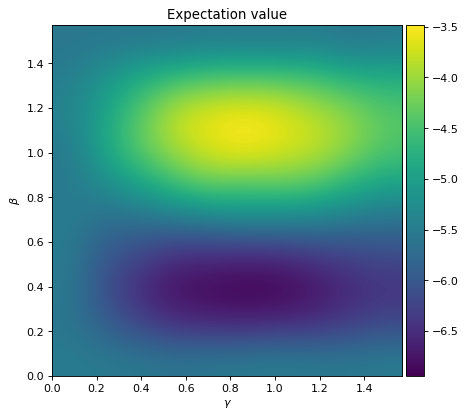

In [61]:
#  Visualize expected values for uniformly sampled gamma/beta pairs

f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)


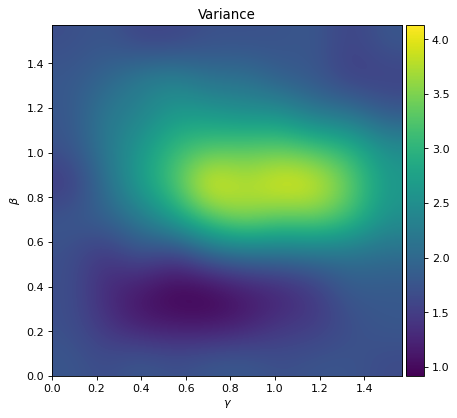

In [62]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [74]:
maxdepth=10
for i in range(maxdepth):
    qaoamc.increase_depth(qasm_sim, 1024)
    qaoamc_cvar.increase_depth(qasm_sim, 1024)

cost(depth= 6 )= -8.097669510275232
cost(depth= 6 )= -8.657714089848158
cost(depth= 7 )= -8.190444802782501
cost(depth= 7 )= -8.657714089848158
cost(depth= 8 )= -8.199893624066346
cost(depth= 8 )= -8.657714089848158
cost(depth= 9 )= -8.321711211259386
cost(depth= 9 )= -8.657714089848158
cost(depth= 10 )= -8.317665326814371
cost(depth= 10 )= -8.657714089848158
cost(depth= 11 )= -8.341366229226104
cost(depth= 11 )= -8.657714089848158
cost(depth= 12 )= -8.305607021865706
cost(depth= 12 )= -8.657714089848158


KeyboardInterrupt: 

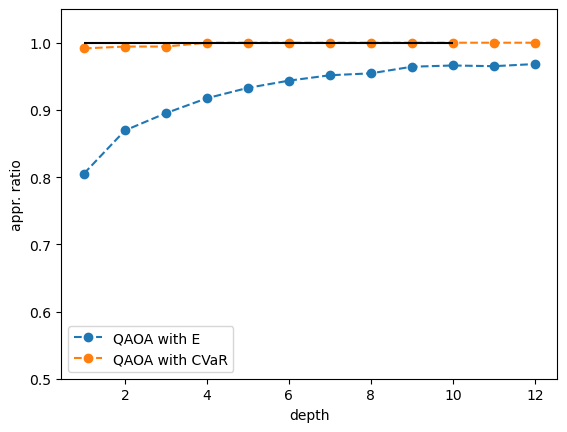

In [76]:
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc.costval.values()))/mincost,'o--', label='QAOA with E')
pl.plot(np.arange(1,maxdepth+1), np.array(list(qaoamc_cvar.costval.values()))/mincost,'o--', label='QAOA with CVaR')
pl.hlines(1, 1,maxdepth, linestyles="solid", colors="black")
pl.ylim(0.5,1.05)
_=pl.ylabel('appr. ratio')
_=pl.xlabel('depth')
pl.legend()

In [77]:
hist=qaoamc.hist(qaoamc.angles_hist['d'+str(maxdepth)+'_final'], qasm_sim,1024)
hist_cvar=qaoamc_cvar.hist(qaoamc.angles_hist['d'+str(maxdepth)+'_final'], qasm_sim,1024)
bins={}
bins_cvar={}
for key in hist:
    c=-qaoamc.cost(key[::-1])
    bins[c]=bins.get(c,0)
    bins[c]+=hist[key]
for key in hist_cvar:
    c_cvar=-qaoamc_cvar.cost(key[::-1])
    bins_cvar[c_cvar]=bins_cvar.get(c,0)
    bins_cvar[c_cvar]+=hist_cvar[key]


bins=dict(sorted(bins.items()))
bins_cvar=dict(sorted(bins_cvar.items()))


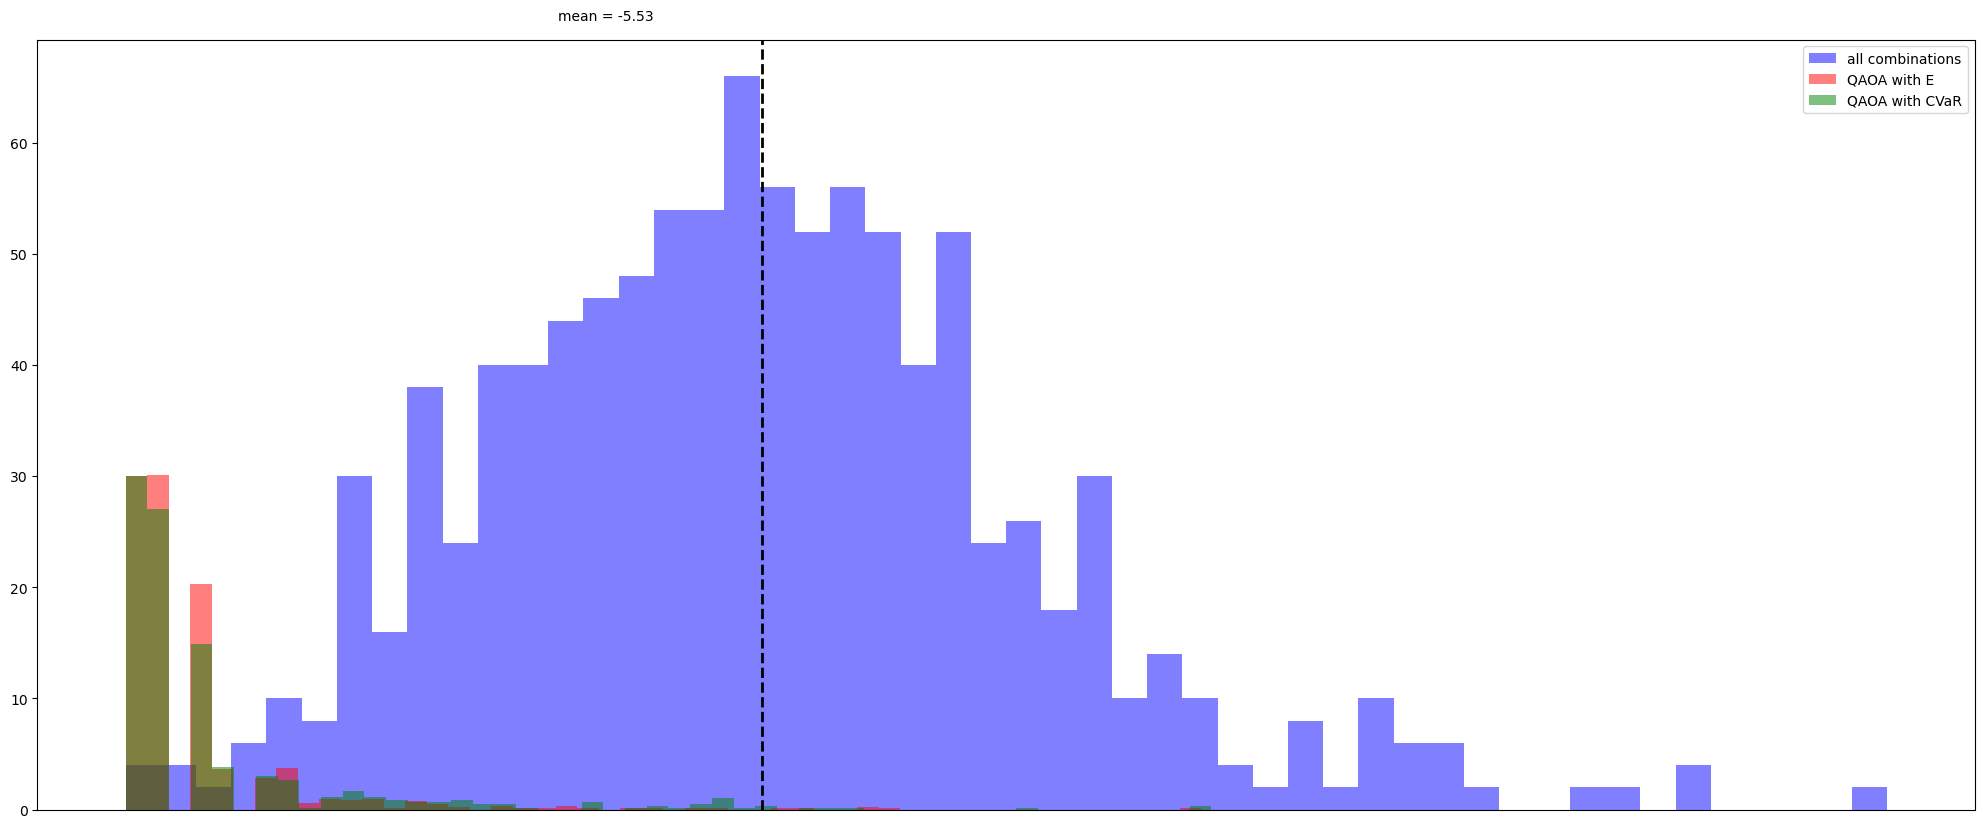

In [78]:
max_val=max(costs)

pl.figure(figsize=(25,10))
_=pl.hist(np.sort(costs), bins=50, alpha = 0.5, color= 'b', label='all combinations')
w=np.array(list(bins.values()))
_=pl.hist(bins.keys(),bins=50,weights=w/max(w)*30, alpha = 0.5, color= 'r', label='QAOA with E')
w=np.array(list(bins_cvar.values()))
_=pl.hist(bins_cvar.keys(),bins=50,weights=w/max(w)*30, alpha = 0.5, color= 'g', label='QAOA with CVaR')
min_ylim, max_ylim = pl.ylim()
max_ylim *=1.025
mean=np.mean(costs)
pl.axvline(mean, color='k', linestyle='dashed', linewidth=2)
_=pl.text(mean-1, max_ylim, 'mean = {:.2f}'.format(mean))
_=pl.xticks(np.arange(0, max_val, step=1))
pl.legend()

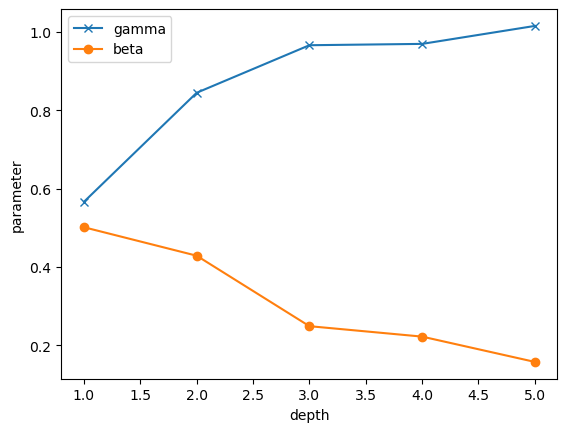

In [67]:
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][::2],"x-",label='gamma')
pl.plot(np.arange(1,maxdepth+1),qaoamc.angles_hist['d'+str(maxdepth)+'_final'][1::2],"o-",label='beta')
_=pl.ylabel('parameter')
_=pl.xlabel('depth')
_=pl.legend()

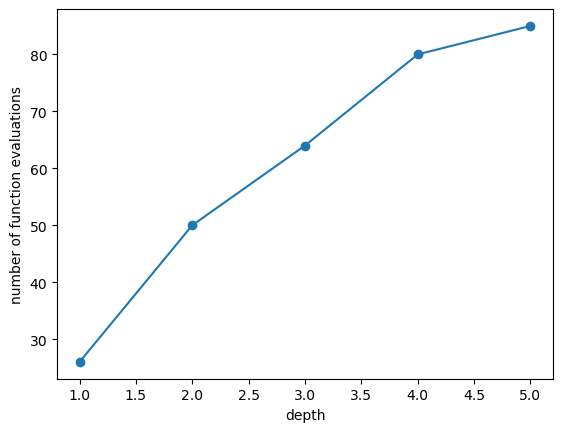

In [68]:
_=pl.plot(np.arange(1,maxdepth+1),qaoamc.num_fval.values(),"o-")
_=pl.ylabel('number of function evaluations')
_=pl.xlabel('depth')

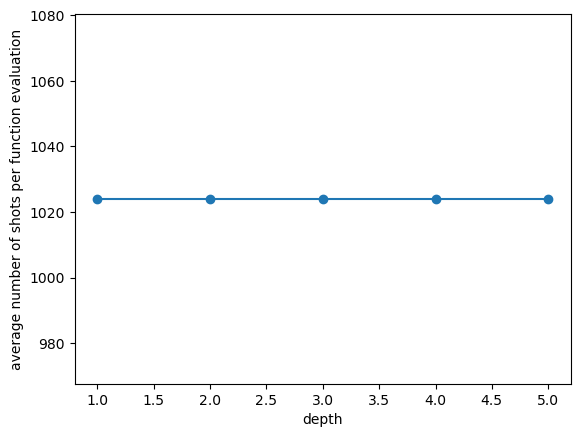

In [69]:
_=pl.plot(np.arange(1,maxdepth+1),np.array(list(qaoamc.num_shots.values()))/np.array(list(qaoamc.num_fval.values())),"o-")
_=pl.ylabel('average number of shots per function evaluation')
_=pl.xlabel('depth')

In [70]:
cvar_test = np.array([])
print(cvar_test)
for i in range(5):
    r = np.random.rand()
    idx = np.searchsorted(cvar_test, r)
    cvar_test = np.insert(cvar_test, idx, r)
    print(cvar_test)

[]
[0.04041053]
[0.04041053 0.63260662]
[0.04041053 0.38203139 0.63260662]
[0.04041053 0.23539273 0.38203139 0.63260662]
[0.04041053 0.23539273 0.32950301 0.38203139 0.63260662]


In [71]:
cvar_test * np.array([1.0, 10, 100, 1000, 10000])

array([4.04105293e-02, 2.35392730e+00, 3.29503008e+01, 3.82031394e+02,
       6.32606623e+03])